*ЗПШ-2021, сезон 29¾ :: "Как устроены случайности?"*
*zpsh@bochkarev.io*

# Занятие 4: случайные величины 2 -- непрерывный случай
- обобщение на непрерывный случай
- функция распределения, плотность
- мат. ожидание, дисперсия
- примеры непрерывных СВ
- нормальное распределение

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

## Интуиция про непрерывные СВ
- У нас была случайная величина $\xi$ -- принимавшая конечное (или счетное) число значений. 
- Мы ее называли "дискретной" и описывали вероятностью для каждого значения, т.е. $\mathbb{P}(\xi=x_i)=p_i$ ("распределение", probability mass function)
- ... но что, если мы хотим сгенерировть *больше* значений? Скажем, "что угодно между 0 и 1"? (строгого определения пока не даем)
- более того: интуитивно, мы часто хотим моделировать вероятности попадания куда-то *в расчете на единицу длины интервала*.

Сначала: что такое **гистограмма**?

### Гистограмма

![histogram](./images/histogram.png)

*(whiteboard)*
- неформально: мы хотим задавать "*частоты на единицу х*"
- это называется **плотностью распределения**, $p(x)$ (непрерывная, неотрицательная функция).
- кстати, тогда вероятность $\mathbb{P}(\xi=x)=0$ -- для любого $x$.

Поэтому такие величины (и дискретные тоже) можно описывать **"функцией распределения"** (CDF -- cumulative distribution function):

$$F_\xi(x) := \mathbb{P}(\xi \leq x)\nonumber.$$

Грубо говоря,
- $F(-\infty)$ -- ноль,
- $F(+\infty)$ -- один.
- $F$ -- неубывающая.

(если вам тоже противно такое нестрогое описание, нужно мыслить в терминах пределов, например, $\lim_{x\rightarrow \infty}F(x)=1$)

Таким образом,
- $F_\xi(x) := \mathbb{P}(\xi \leq x) = \int_{-\infty}^x p(x)dx$
- $\mathbb{E}\xi := \int_{-\infty}^{\infty} xp(x)dx$ (ср. $\sum_{x=-\infty}^{\infty}x p(x)$ для дискретной)
- $D\xi$ определяется все так же: $\mathbb{E}(\xi-\mathbb{E}\xi)^2$.

### Примеры непрерывных случайных величин
*(whiteboard)*

#### Равномерное распреление на $[a,b]$
- $p(x) = 1/(b-a)$ при $x\in[a,b]$, или $0$ иначе.
- $F(x) = 0$, при $x<a$; $1$ если $x>b$, либо $(x-a)/(b-a)$ иначе.

#### Нормальное распределение

$$p(x; \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}}e^\frac{-(x-\mu)^2}{2\sigma^2}\nonumber$$

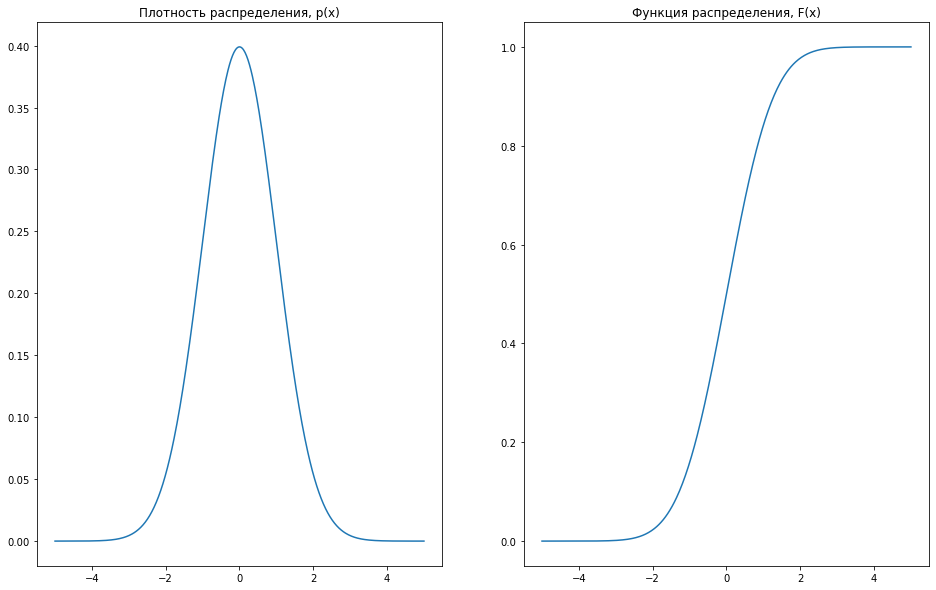

In [56]:
x = np.linspace(-5,5, 500); fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,10))
ax1.set_title("Плотность распределения, p(x)"); sns.lineplot(x, norm.pdf(x), ax=ax1)
ax2.set_title("Функция распределения, F(x)");sns.lineplot(x, norm.cdf(x), ax=ax2)

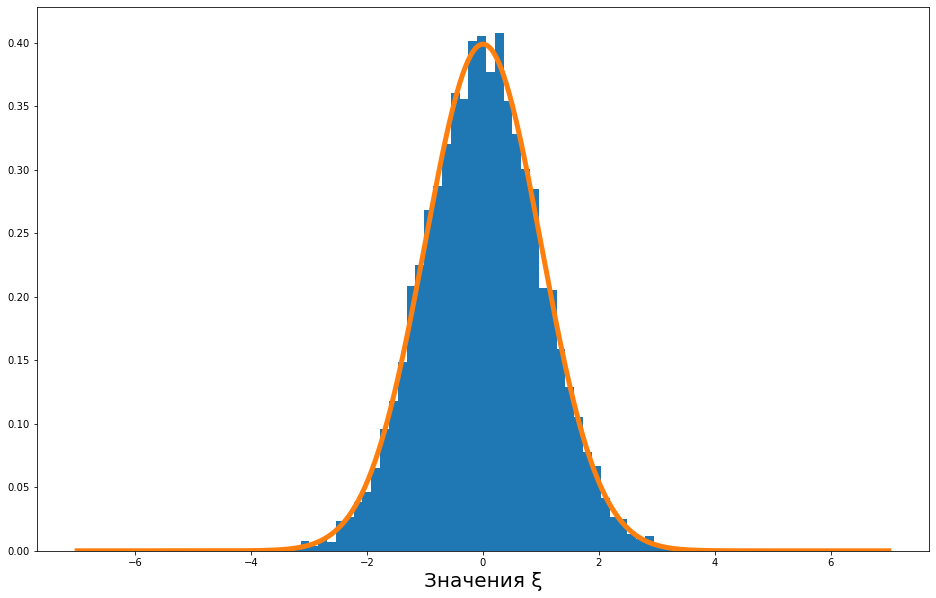

In [55]:
# численный пример

plt.subplots(figsize=(16,10)); plt.xlabel("Значения ξ", fontsize=20)
plt.hist([np.random.normal() for _ in range(10000)], bins=50, density=True);
plt.plot(x, norm.pdf(x), linewidth=5); 

### ЦПТ / CLT (иллюстрация)

- Давайте возьмем дискретную случайную величину -- Биномиальную, $\mathbb{P}(\xi=x)=C_n^k p^k(1-p)^{n-k}$.
- возьмем выборку из $m$ реализаций, и посчитаем среднее $X_m := (\xi_1 + \ldots + \xi_m) / m$ -- а точнее, сделаем другую случайную величину.
- теперь сделаем из нее непрерывную, вот так: $\eta := \frac{X_m-\mathbb{E}(\xi)}{\sigma\sqrt{m}}$. 
- И посмотрим на ее распределение.

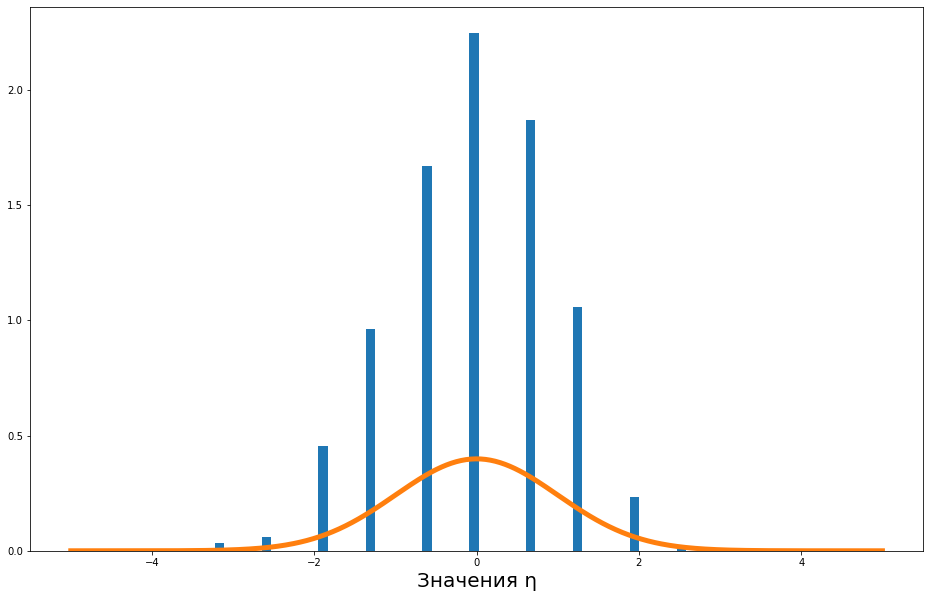

In [131]:
p = 0.6; n=10

def X(m):
    return sum([np.random.binomial(n,p) for _ in range(m)])/m

def eta(m):
    return (X(m) - n*p)/(np.sqrt(n*p*(1-p)/m))

m = 1
plt.subplots(figsize=(16,10)); plt.xlabel("Значения η", fontsize=20)
plt.hist([eta(m) for _ in range(1000)], bins=50, density=True);
plt.plot(x, norm.pdf(x), linewidth=5); 

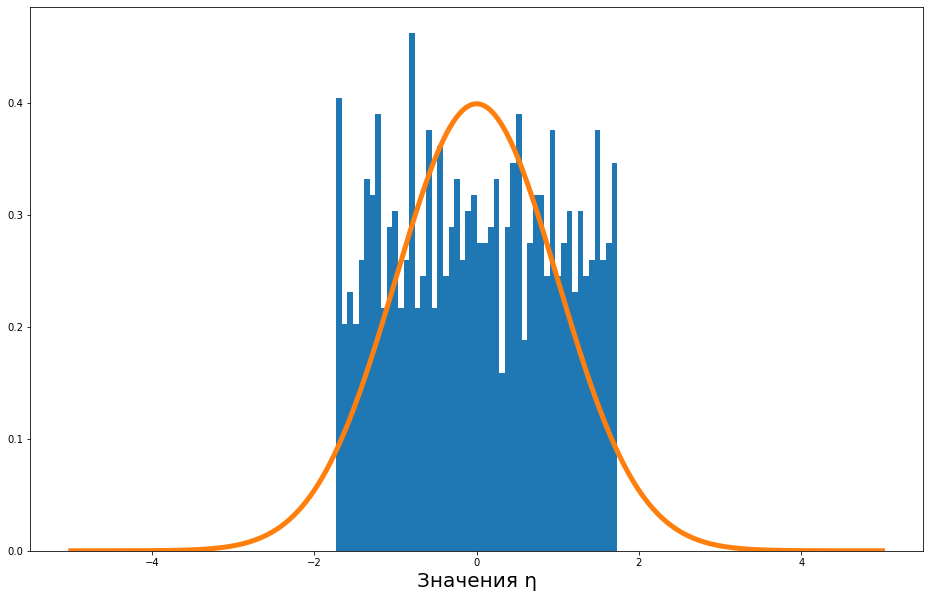

In [137]:
# может, показалось?..

def X(m):
    return sum([np.random.uniform() for _ in range(m)])/m

def eta(m):
    return (X(m) - 0.5)/np.sqrt(((1/12)/m))

m = 1
plt.subplots(figsize=(16,10)); plt.xlabel("Значения η", fontsize=20)
plt.hist([eta(m) for _ in range(1000)], bins=50, density=True);
plt.plot(x, norm.pdf(x), linewidth=5); 

Общая идея: $\eta := \sqrt{n}(\bar{\xi}-\mathbb{E}\xi)$, где $\bar{\xi} := (\xi_1+\ldots+\xi_n)$, начинает себя вести как нормальная $N(\mu=0, \sigma=D\xi)$.